# VLM for KOMO

In [15]:
import time
import torch
import matplotlib.pyplot as plt

from high_level_funcs import RobotEnviroment
from utils import generate_demo_scene, cleanup_highlvl_func

In [16]:
torch.cuda.empty_cache()

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device Name: {torch.cuda.get_device_name(device)}" if device.type == "cuda" else "Using cpu")

Device Name: NVIDIA GeForce RTX 3090


## Prepare your scene

In [18]:
C = generate_demo_scene()
C.view()

0

## Take a picture of the scene

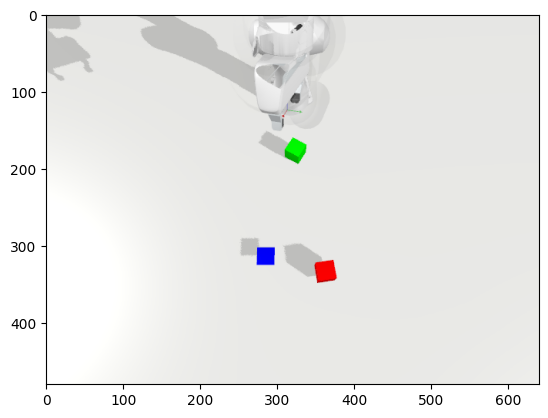

In [19]:
camera_frame = C.getFrame('topCamera')
print(camera_frame)
C.view_setCamera(camera_frame)
C.view()
time.sleep(1.)

rgb = C.view_getRgb()
depth = C.view_getDepth()

img_idx = 0
image_path = "../scene_image0.jpg"
plt.imsave(image_path, rgb)
plt.imshow(rgb)

In [20]:
"""The following text defines abstract primitive functions which are well defined already. You can use them for manipulating the robot arm as you like.

pick(object_name)
- Generates a pick motion of an object
- Parameters:
  - object_name (str): The name of the object to be picked

place(x, y, z)
- Generates a place motion of the robots object in hand, this means that a pick is first necessary
- Parameters: 
  - x (float): The absolute x target position to place the object
  - y (float): The absolute y target position to place the object
  - z (float): The absolute z target position to place the object

push(object_name, x_rel, y_rel)
- Generates a push motion of a specific object into a direction
- Parameters:
  - object_name (str): The name of the object to be pushed
  - x_rel (float): the relative x coordinate of the push
  - y_rel (float): the relative y coordinate of the push

getObj(object_name)
- Returns an object from which the following parameters can be queried: pos.x, pos.y, pos.z, size.x, size.y, size.z
- Parameters:
  - object_name (str): The name of the object to be pushed

Given the robotic primitive functions  write a python function to solve the problem that will be defined later on.

Do not write any literal numbers if possible, all inputs to the primitive functions should be object parameters from the returned object in the getObject function and scalings of these values.
Don't forget to pick before you place! Explain your answer. Be careful to follow the correct usage of the functions as descried earlier.
It should solve the following problem: 
pick the red block and push with it the green block  towards the the goal area 

Here is a list of all available object names: ['world', 'table', 'topCamera', 'cameraWrist', 'panda_collCameraWrist', 'block_red', 'block_green', 'goal_area']"""

"The following text defines abstract primitive functions which are well defined already. You can use them for manipulating the robot arm as you like.\n\npick(object_name)\n- Generates a pick motion of an object\n- Parameters:\n  - object_name (str): The name of the object to be picked\n\nplace(x, y, z)\n- Generates a place motion of the robots object in hand, this means that a pick is first necessary\n- Parameters: \n  - x (float): The absolute x target position to place the object\n  - y (float): The absolute y target position to place the object\n  - z (float): The absolute z target position to place the object\n\npush(object_name, x_rel, y_rel)\n- Generates a push motion of a specific object into a direction\n- Parameters:\n  - object_name (str): The name of the object to be pushed\n  - x_rel (float): the relative x coordinate of the push\n  - y_rel (float): the relative y coordinate of the push\n\ngetObj(object_name)\n- Returns an object from which the following parameters can be q

## Main loop

In [21]:
# out = prompt_qwen(model, processor, device, messages)
out = """def solve_problem():
    # Retrieve object parameters
    red_block = getObj('block_red')
    green_block = getObj('block_green')
    goal_area = getObj('goal_area')
    
    # Step 1: Pick the red block
    pick('block_red')
    
    # Step 2: Compute relative push direction
    # Target position for the green block is near the goal area
    # Relative push direction based on green block's position and goal area
    x_rel = goal_area.pos.x - green_block.pos.x
    y_rel = goal_area.pos.y - green_block.pos.y
    
    # Step 3: Push the green block
    push('block_green', x_rel, y_rel)
"""


out = cleanup_highlvl_func(out, compute_collisions=False)
print(out)

exec(out)

def solve_problem():
    env = RobotEnviroment(C, visuals=True, verbose=1, compute_collisions=False)
    # Retrieve object parameters
    red_block = env.getObj('block_red')
    green_block = env.getObj('block_green')
    goal_area = env.getObj('goal_area')
    
    # Step 1: Pick the red block
    env.pick('block_red')
    
    # Step 2: Compute relative push direction
    # Target position for the green block is near the goal area
    # Relative push direction based on green block's position and goal area
    x_rel = goal_area.pos.x - green_block.pos.x
    y_rel = goal_area.pos.y - green_block.pos.y
    
    # Step 3: Push the green block
    env.push('block_green', x_rel, y_rel)

solve_problem()
  -- feasible:
     { time: 0.003547, evals: 47, done: 1, feasible: 1, eq: 7.29006e-06, ineq: 2.31635e-06, sos: 0.0374511, f: 0 }
  -- feasible:sub_motion_0--
     { time: 0.015183, evals: 20, done: 1, feasible: 1, eq: 0.000402045, ineq: 2.37921e-07, sos: 1.06257, f: 0 }
  -- feasible:
     